In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vireoSNP
from utilities import *
import re
import os

## Read data 

In [2]:
## Chose1 option 1 - read p-value data
folder_path = "/home/linxy29/data/maester/oagct/gctb2/variant_selection/"
res_name = "HEMO_pipeline_maester_cellSNP_celltype_TumorvsNorm"
output_folder = folder_path + res_name + "_analysis/"## get the p-value of the paper site
## if the output folder does not exist, create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
res = pd.read_csv(folder_path + res_name + "_res.csv", index_col=0)
res['group'] = 'tumor'
print("The dimension of the p-value data is: ", res.shape)
res.reset_index(inplace=True)
print(res.head())

The dimension of the p-value data is:  (11713, 5)
  variant  Wald_pval    LR_val  LRT_pval   LRT_fdr  group
0  899G>C   0.003437  8.913995  0.002830  0.057949  tumor
1  900C>N   0.162683  2.191777  0.138749  0.590541  tumor
2  901G>T   0.402715  0.713839  0.398172  0.845503  tumor
3  902G>C   0.194938  2.102691  0.147040  0.607672  tumor
4  903T>G   0.189956  2.409088  0.120633  0.555812  tumor


In [3]:
## Chose1 option 2 - read p-value data where L86 and L98 are calculated separately
folder_path = "/home/linxy29/data/maester/oagct/gctb2/variant_selection/"
## L86 sample
res_name = "HEMO_pipeline_maester_cellSNP_celltype_L86TumorvsNorm"
res1 = pd.read_csv(folder_path + res_name + "_res.csv", index_col=0)
res1['group'] = 'L86'
res1.reset_index(inplace=True)
print("The dimension of the p-value data is: ", res1.shape)
## L98 sample
res_name = "HEMO_pipeline_maester_cellSNP_celltype_L98TumorvsNorm"
res2 = pd.read_csv(folder_path + res_name + "_res.csv", index_col=0)
res2['group'] = 'L98'
res2.reset_index(inplace=True)
print("The dimension of the p-value data is: ", res2.shape)
## bind the two dataframes
res = pd.concat([res1, res2], axis=0)
print("The dimension of the p-value data is: ", res.shape)

## output folder: if the output folder does not exist, create it
output_folder = folder_path + "HEMO_pipeline_maester_cellSNP_celltype_gctb2TumorvsNorm_gctb2subset_analysis/"## get the p-value of the paper site
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

The dimension of the p-value data is:  (9647, 6)
The dimension of the p-value data is:  (10771, 6)
The dimension of the p-value data is:  (20418, 6)


In [4]:
variant_folder = "/home/linxy29/data/maester/oagct/gctb2/HEMO_pipeline_maester_cellSNP_gctb2subset/"
gctb2_mquad, gctb2_barcode = load_cellsnp(variant_folder)
print("The dimension of the AD data is: ", gctb2_mquad.ad.shape)
print("The dimension of the DP data is: ", gctb2_mquad.dp.shape)
print("The number of mtSNPs is: ", len(gctb2_mquad.variants))

14877 variants detected
variant names detected
The dimension of the AD data is:  (14877, 5355)
The dimension of the DP data is:  (14877, 5355)
The number of mtSNPs is:  14877


In [ ]:
# Chose2 option1 - Read clone ID - 1vsL86Norm
cloneID = pd.read_csv("/home/linxy29/data/maester/oagct/gctb2/HEMO_pipeline_maester_cellSNP_refHCA_anno.csv")
print("The dimension of the clone ID data is: ", cloneID.shape)
print(cloneID.head())

The dimension of the clone ID data is:  (18140, 2)
                 cellID  cell_label
0  L86_AAACCCACAGTTAGGG  L86_normal
1  L86_AAACCCAGTGCACATT  L86_normal
2  L86_AAACCCAGTGTGTTTG  L86_normal
3  L86_AAACCCAGTTATGTGC  L86_normal
4  L86_AAACCCAGTTGAGGAC  L86_normal


In [5]:
# Chose2 option2 - Read clone ID - TumorvsNorm
cloneID = pd.read_csv("/home/linxy29/data/GCTB/gctb2_anno.csv")
cloneID['cellID'] = cloneID['barcode'].str.replace('-1', "")
cloneID['cell_label'] = cloneID['celltype'].apply(lambda x: 'Tumor' if x == 'Mesenchymal' else 'Normal')
cloneID['sample'] = cloneID['barcode'].apply(lambda x: 'L86' if x.startswith('L86') else 'L98')
cloneID['sample_label'] = cloneID['sample'] + "_" + cloneID['cell_label']
cloneID = cloneID[['cellID', 'cell_label', 'sample', 'sample_label']]
print("The dimension of the clone ID data is: ", cloneID.shape)
print(cloneID.head())

The dimension of the clone ID data is:  (7537, 4)
                 cellID cell_label sample sample_label
0  L86_AAACCCAGTGCACATT     Normal    L86   L86_Normal
1  L86_AAACCCAGTTATGTGC     Normal    L86   L86_Normal
2  L86_AAACCCAGTTTCACTT     Normal    L86   L86_Normal
3  L86_AAACGAAAGGAGCTGT      Tumor    L86    L86_Tumor
4  L86_AAACGAACAATGTCTG     Normal    L86   L86_Normal


In [ ]:
# Optional - Read germline variants
file_name_L98 = "/home/linxy29/data/maester/oagct/gct98/HEMO_pipeline/maester_cellSNP/germline_variant.csv"
germline_L98 = np.genfromtxt(file_name_L98, delimiter=",", dtype=str)
file_name_L86 = "/home/linxy29/data/maester/oagct/gct86/HEMO_pipeline/maester_cellSNP/germline_variant.csv"
germline_L86 = np.genfromtxt(file_name_L86, delimiter=",", dtype=str)
germline = np.concatenate([germline_L98, germline_L86])
germline = np.unique(germline)

# Function to modify each element
def modify_element(element):
    parts = element.split('_')
    return f"{parts[1]}{parts[2]}>{parts[3]}"

# Apply the function to each element in the array
germline = np.array([modify_element(item) for item in germline], dtype='<U14')

print("The number of germline variants is: ", len(germline))
print(germline)

##  Plot

Plot 1) Description of P-values.

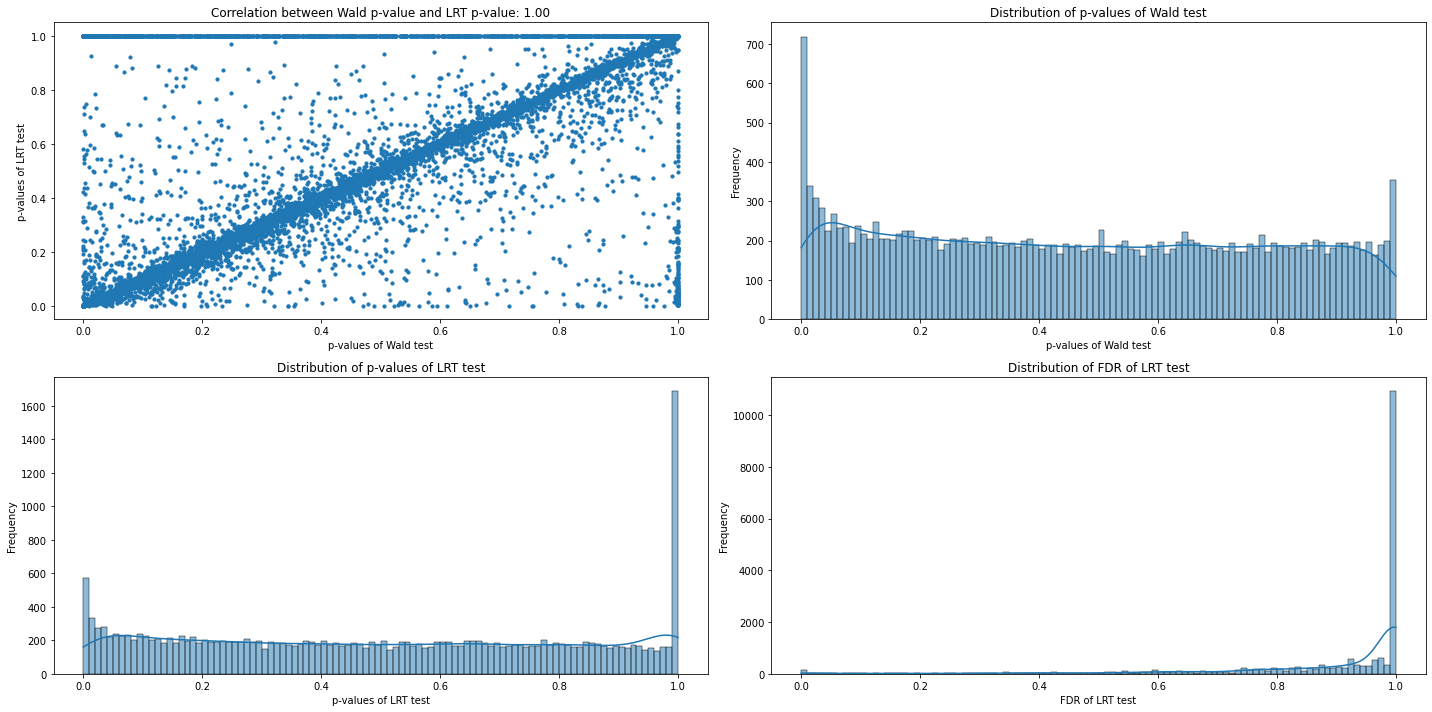

In [6]:
# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot the dot plot of the p-values in the first subplot
axes[0,0].scatter(res['Wald_pval'], res['LRT_pval'], s=10)  # Increased the size for better visibility
axes[0,0].set_xlabel('p-values of Wald test')
axes[0,0].set_ylabel('p-values of LRT test')
correlation = res['LRT_pval'].corr(res['LRT_pval'])
axes[0,0].set_title(f'Correlation between Wald p-value and LRT p-value: {correlation:.2f}')

# Plot the distribution of res['LRT_pval'] in the second subplot
sns.histplot(res['Wald_pval'], bins=100, kde=True, ax=axes[0,1])
axes[0,1].set_xlabel('p-values of Wald test')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of p-values of Wald test')

# Plot the distribution of res['LRT_pval'] in the third subplot
sns.histplot(res['LRT_pval'], bins=100, kde=True, ax=axes[1,0])
axes[1,0].set_xlabel('p-values of LRT test')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of p-values of LRT test')

# Plot the distribution of res['LR_fdr'] in the fourth subplot
sns.histplot(res['LRT_fdr'], bins=100, kde=True, ax=axes[1,1])
axes[1,1].set_xlabel('FDR of LRT test')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of FDR of LRT test')

# Show the plot
plt.tight_layout()

# Save the plot
plt.savefig(output_folder + "pval_distribution.pdf")
plt.show()

### Calculate variance and order variants.

In [7]:
## calculate the allel frequency
af = np.divide(gctb2_mquad.ad, gctb2_mquad.dp, where=gctb2_mquad.dp!=0)
af[np.isnan(af)] = 0
## get the mean of af
mean_af = np.mean(af, axis=1)
variance_af = np.var(af, axis=1)
SNR_af = np.divide(mean_af, variance_af, where=variance_af!=0)
## create a dataframe to store the mean and variance of af
af_statsitics = pd.DataFrame({'variant':gctb2_mquad.variants, 'mean_af': mean_af, 'variance_af': variance_af, 'SNR_af': SNR_af})

In [8]:
# left join the af_statistics to the res
res = res.merge(af_statsitics, on='variant', how='left')
# remove the variants with mean af is NaN
res = res[~res['mean_af'].isnull()]
print("The dimension of the p-value data is: ", res.shape)
print(res.head())

The dimension of the p-value data is:  (19250, 9)
  variant  Wald_pval    LR_val  LRT_pval   LRT_fdr group   mean_af  \
0  899G>C   0.871441  0.179094  0.672153  1.000000   L86  0.000133   
1  901G>T   0.948700  0.004157  0.948591  1.000000   L86  0.000382   
4  904C>A   0.662557 -0.154612  1.000000  1.000000   L86  0.000461   
5  905A>C   0.649803  0.208020  0.648324  1.000000   L86  0.001687   
6  906C>A   0.107020  2.550321  0.110272  0.888716   L86  0.000561   

   variance_af      SNR_af  
0     0.000001   91.095063  
1     0.000003  121.961695  
4     0.000003  135.553987  
5     0.000014  124.009409  
6     0.000006  100.858341  


In [9]:
## optional - exclude germline variants
## select rows with variant in germline 
res_germline = res[res['variant'].isin(germline)]
print("The dimension of the p-value data is: ", res_germline.shape)
print(res_germline.Wald_pval.describe())
print(res_germline.LRT_pval.describe())
print(res_germline.LRT_fdr .describe())

## select rows with variant not in germline
res = res[~res['variant'].isin(germline)]
print("The dimension of the p-value data is: ", res.shape)

The dimension of the p-value data is:  (124, 9)
count    124.000000
mean       0.362687
std        0.327619
min        0.000000
25%        0.035885
50%        0.282933
75%        0.650151
max        0.995542
Name: Wald_pval, dtype: float64
count    1.240000e+02
mean     3.773536e-01
std      3.440078e-01
min      1.492669e-48
25%      5.029143e-02
50%      2.846452e-01
75%      7.056703e-01
max      1.000000e+00
Name: LRT_pval, dtype: float64
count    1.240000e+02
mean     7.593237e-01
std      3.378427e-01
min      8.038770e-45
25%      6.346656e-01
50%      9.652140e-01
75%      1.000000e+00
max      1.000000e+00
Name: LRT_fdr, dtype: float64
The dimension of the p-value data is:  (19126, 9)


In [9]:
pval_column = 'Wald_pval'
group = 'L86'

## Save for embedding methods

In [11]:
## find the subset of res.cellID and gctb2_barcode
overlap_cell = np.intersect1d(cloneID['cellID'], gctb2_barcode)
print("The number of overlapping cells is: ", len(overlap_cell))
## find the index for mquad subset
include_cell_index = np.where(np.isin(gctb2_barcode, overlap_cell))[0]

The number of overlapping cells is:  1841


In [12]:
sig_test_variant = res[res[pval_column] < 0.05]['variant'].unique()
print("The number of significant sites by LRT test is: ", len(sig_test_variant))
sig_test_mquad_index = [gctb2_mquad.variants.index(item) for item in sig_test_variant]
sig_test_variants_mquad, sig_test_variants_barcode = select_mquad(gctb2_mquad, gctb2_barcode, include_indices= sig_test_mquad_index, include_cell=include_cell_index)
write_mquad(sig_test_variants_mquad, sig_test_variants_barcode, output_folder + pval_column.replace("_pval", "") + "Variant")
print("The dimension of the AD data is: ", sig_test_variants_mquad.ad.shape)
print("The dimension of the DP data is: ", sig_test_variants_mquad.dp.shape)
print("The number of mtSNPs is: ", len(sig_test_variants_mquad.variants))

The number of significant sites by LRT test is:  1637
The dimension of the AD data is:  (1637, 1841)
The dimension of the DP data is:  (1637, 1841)
The number of mtSNPs is:  1637


save the variant information for tumor cells only

In [7]:
## find the subset of res.cellID and barcodes of tumor cells
subset_cloneID = cloneID[cloneID['cell_label'] == 'Tumor']
overlap_cell = np.intersect1d(subset_cloneID, gctb2_barcode)
print("The number of overlapping tumor cells is: ", len(overlap_cell))
## find the index for mquad subset
include_cell_index = np.where(np.isin(gctb2_barcode, overlap_cell))[0]

The number of overlapping tumor cells is:  558


In [11]:
sig_test_variant = res[res[pval_column] < 0.05]['variant'].unique()
subset_variant = np.intersect1d(sig_test_variant, gctb2_mquad.variants)
print("The number of selected variants is: ", len(subset_variant))
subset_variant_index = [gctb2_mquad.variants.index(item) for item in subset_variant]
sig_test_variants_mquad, sig_test_variants_barcode = select_mquad(gctb2_mquad, gctb2_barcode, include_indices= subset_variant_index, include_cell=include_cell_index)
write_mquad(sig_test_variants_mquad, sig_test_variants_barcode, output_folder + pval_column.replace("_pval", "") + "Variant_tumor")
print("The dimension of the AD data is: ", sig_test_variants_mquad.ad.shape)
print("The dimension of the DP data is: ", sig_test_variants_mquad.dp.shape)
print("The number of mtSNPs is: ", len(sig_test_variants_mquad.variants))

The number of selected variants is:  1663
The dimension of the AD data is:  (1663, 558)
The dimension of the DP data is:  (1663, 558)
The number of mtSNPs is:  1663


In [21]:
# order the res data by group, pval_column (ascending) and then variant (descending)
## select the part that are not number in variant
res['variantype'] = res['variant'].str.extract(r'([A-Za-z]>[A-Za-z])')
#res = res.sort_values(by=['group', pval_column, 'variance_af'], ascending=[True, True, False])
res = res.sort_values(by=['group', pval_column, 'SNR_af'], ascending=[True, True, False])
print(res.head())

       variant     Wald_pval      LR_val       LRT_pval        LRT_fdr group  \
1801   2796G>T  0.000000e+00    4.676985   3.056936e-02   7.457733e-01   L86   
3208   5394A>C  0.000000e+00  756.524845  1.529937e-166  1.475930e-162   L86   
3843   6545C>A  0.000000e+00    8.364295   3.826651e-03   4.682812e-01   L86   
7514  11183C>A  0.000000e+00    1.702700   1.919353e-01   9.360968e-01   L86   
6465   9624T>G  5.107026e-15    0.303788   5.815175e-01   1.000000e+00   L86   

       mean_af  variance_af      SNR_af variantype  
1801  0.000899     0.000014   66.222265        G>T  
3208  0.043322     0.000779   55.647047        A>C  
3843  0.010407     0.000269   38.754192        C>A  
7514  0.013421     0.001186   11.313788        C>A  
6465  0.001784     0.000016  109.043511        T>G  


In [22]:
## select the top 10 significant sites for defined group
#select_pattern = ['C>T', 'T>C', 'G>A', 'A>G']
#top30 = res[(res['group'] == group) & (res[pval_column] == 0) & (res['variantype'].isin(select_pattern))]['variant'].head(30)
top30 = res[(res['group'] == group) & (res[pval_column] < 0.01)]['variant'].head(30)
print("The top 30 significant sites for group ", group, " are: ", top30.to_list())
top30_mquad_index = [gctb2_mquad.variants.index(item) for item in top30 ]
top30_mquad, top30_barcode = select_mquad(gctb2_mquad, gctb2_barcode, include_indices= top30_mquad_index, include_cell=include_cell_index)

The top 30 significant sites for group  L86  are:  ['2796G>T', '5394A>C', '6545C>A', '11183C>A', '9624T>G', '14895T>A', '9203C>A', '2511C>A', '3554T>G', '9198C>A', '14825A>C', '10349C>A', '9201C>A', '7422G>A', '14126T>G', '2715A>C', '1525C>A', '2607T>G', '2696A>T', '6300G>T', '9940T>A', '6019C>A', '8391G>T', '9132A>C', '7953T>A', '2536G>T', '8411A>C', '9246A>C', '2599T>G', '2679T>G']


In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

raw_col = cm.get_cmap('pink_r', 200)
new_colors = raw_col(np.linspace(0, 1, 256))
even_seg_pink = LinearSegmentedColormap.from_list("even_seg_pink", new_colors)
new_col = np.vstack((raw_col(np.linspace(0, 0.7, 10)),
                     raw_col(np.linspace(0.7, 1, 90))))
segpink = ListedColormap(new_col, name='segpink')

The AF heatmap

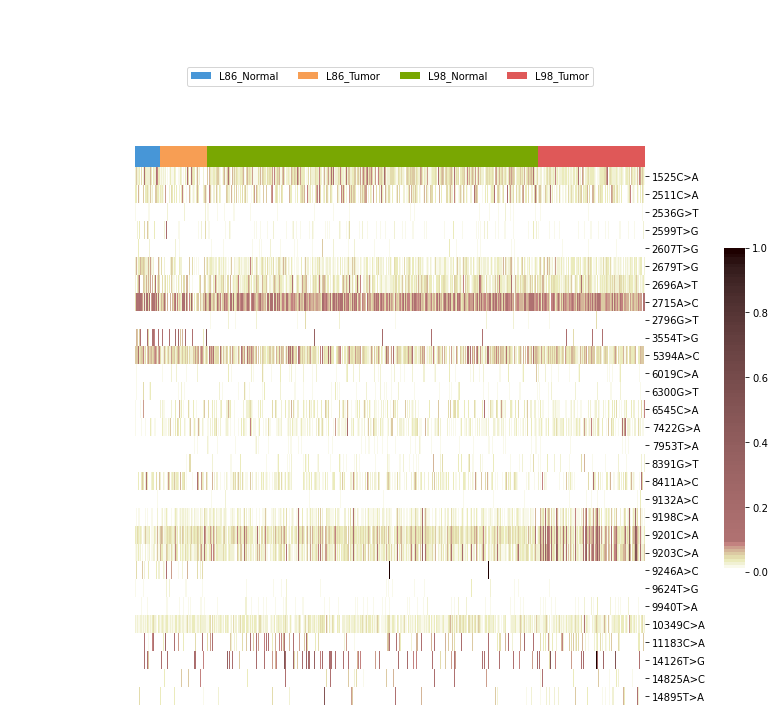

In [23]:
data_array = np.divide(top30_mquad.ad, top30_mquad.dp, where=(top30_mquad.dp != 0))
data_array = np.nan_to_num(data_array)
## plot
mtSNP_ids = top30_mquad.variants
cell_label = [cloneID[cloneID['cellID'] == barcode]['sample_label'].values[0] for barcode in overlap_cell]
id_uniq = np.unique(cell_label)
vireoSNP.plot.anno_heat(data_array, col_anno=cell_label, col_order_ids=id_uniq,
                        cmap=segpink, yticklabels=mtSNP_ids)
plt.savefig(output_folder + group + "top30_" + pval_column.replace("_pval", "") + "_AF_heatmap.pdf")
plt.show()

The mean variance

In [18]:
positive_variants = ['1525C>A', "9198C>A", '9201C>A', "9203C>A"]
## get negative variants if it is in the top 30 but not in the positive_variants
negative_variants = [item for item in top30 if item not in positive_variants]
positive_rows = res[res['variant'].isin(positive_variants) & (res['group'] == group)]
negative_rows = res[res['variant'].isin(negative_variants) & (res['group'] == group)]
group_res = res[res['group'] == group]

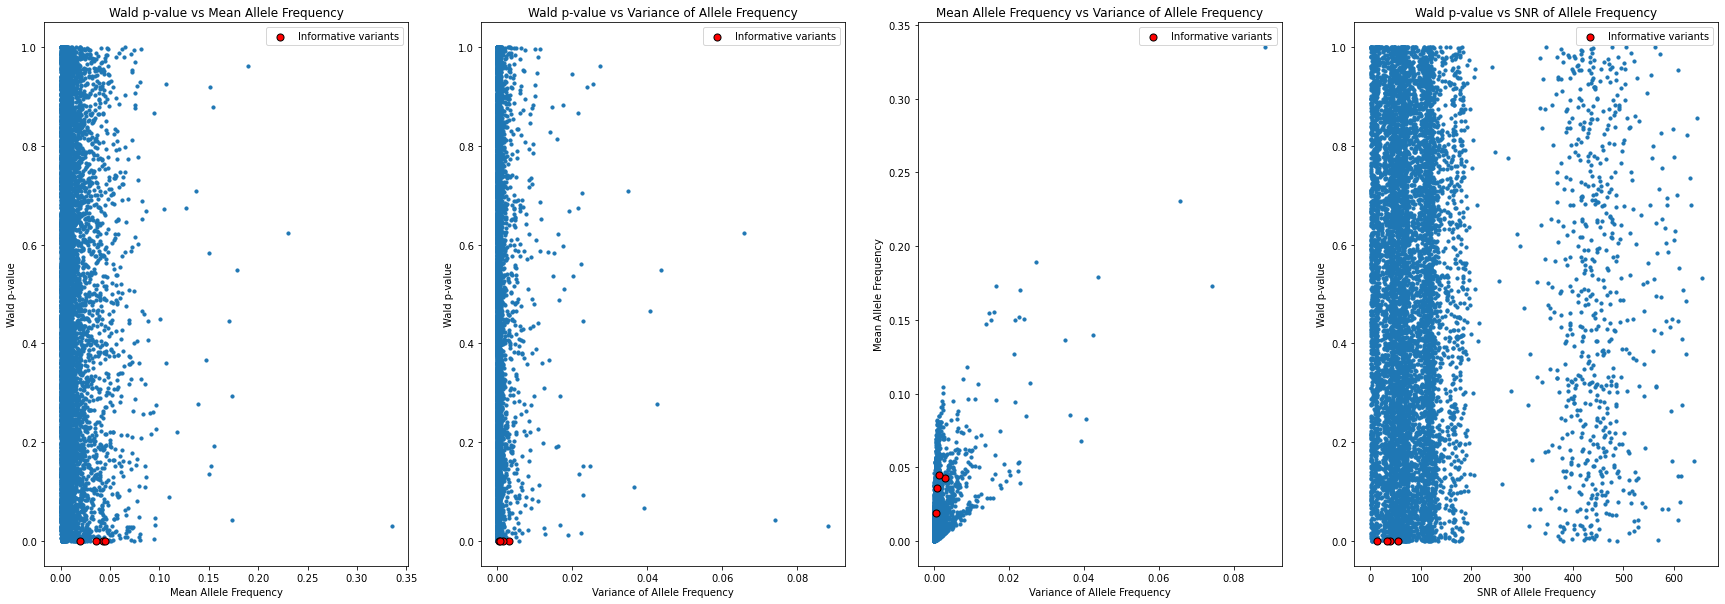

In [20]:
# Plot LRT p-value vs mean af and LRT p-value vs variance af
fig, axes = plt.subplots(1, 4, figsize=(30, 10))

# Plot all rows
axes[0].scatter(group_res['mean_af'], group_res[pval_column], s=10)
# Highlight positive rows
axes[0].scatter(positive_rows['mean_af'], positive_rows[pval_column], s=50, label='Informative variants', color='red', edgecolors='black')
#axes[0].scatter(negative_rows['mean_af'], negative_rows[pval_column], s=50, label='Non-informative variants', color='black', edgecolors='black')
axes[0].set_xlabel('Mean Allele Frequency')
axes[0].set_ylabel(pval_column.replace("_pval", "") + ' p-value')
axes[0].set_title(pval_column.replace("_pval", "") + ' p-value vs Mean Allele Frequency')
axes[0].legend()

# Plot all rows
axes[1].scatter(group_res['variance_af'], group_res[pval_column], s=10)
# Highlight positive rows
axes[1].scatter(positive_rows['variance_af'], positive_rows[pval_column], s=50, label='Informative variants', color='red', edgecolors='black')
#axes[1].scatter(negative_rows['variance_af'], negative_rows[pval_column], s=50, label='Non-informative variants', color='black', edgecolors='black')
axes[1].set_xlabel('Variance of Allele Frequency')
axes[1].set_ylabel(pval_column.replace("_pval", "") + ' p-value')
axes[1].set_title(pval_column.replace("_pval", "") + ' p-value vs Variance of Allele Frequency')
axes[1].legend()

# Plot all rows
axes[2].scatter(group_res['variance_af'], group_res['mean_af'], s=10)
# Highlight positive rows
axes[2].scatter(positive_rows['variance_af'], positive_rows['mean_af'], s=50, label='Informative variants', color='red', edgecolors='black')
#axes[2].scatter(negative_rows['variance_af'], negative_rows['mean_af'], s=50, label='Non-informative variants', color='black', edgecolors='black')
axes[2].set_xlabel('Variance of Allele Frequency')
axes[2].set_ylabel('Mean Allele Frequency')
axes[2].set_title('Mean Allele Frequency vs Variance of Allele Frequency')
axes[2].legend()

# Plot all rows
axes[3].scatter(group_res['SNR_af'], group_res[pval_column], s=10)
# Highlight positive rows
axes[3].scatter(positive_rows['SNR_af'], positive_rows[pval_column], s=50, label='Informative variants', color='red', edgecolors='black')
#axes[3].scatter(negative_rows['SNR_af'], negative_rows[pval_column], s=50, label='Non-informative variants', color='black', edgecolors='black')
axes[3].set_xlabel('SNR of Allele Frequency')
axes[3].set_ylabel(pval_column.replace("_pval", "") + ' p-value')
axes[3].set_title(pval_column.replace("_pval", "") + ' p-value vs SNR of Allele Frequency')
axes[3].legend()

# Save the plot
plt.savefig(output_folder + pval_column + "_vs_af_mean_variance_.pdf")
plt.show()

## SNP_VAE plots

In [29]:
## read SNP_VAE result
SNP_VAE_res = pd.read_csv(output_folder + pval_column.replace("_pval", "") + "Variant/SNP_VAE_results/SNP_VAE_results.csv")
## merge with cloneID
SNP_VAE_res = SNP_VAE_res.merge(cloneID, left_on='barcode', right_on='cellID', how='left')
print("The dimension of the SNP_VAE result is: ", SNP_VAE_res.shape)
print(SNP_VAE_res.head())

The dimension of the SNP_VAE result is:  (1841, 19)
   Unnamed: 0  label_0  label_1  label_2  label_3  label_4  label_5  label_6  \
0           0        1        1        1        1        1        1        0   
1           1        1        1        1        1        1        1        0   
2           2        1        1        1        1        1        1        0   
3           3        1        1        1        1        1        1        0   
4           4        1        1        1        1        1        1        0   

   label_7  label_8               barcode     PCA_1     PCA_2     UMAP_1  \
0        1        1  L86_AAAGGATTCAGAGCGA  7.341143 -2.336225  18.484932   
1        1        1  L86_AACAAGAAGTCACGAG  6.008364 -1.265578  18.914104   
2        1        1  L86_AACCTGACAATGTGGG  7.748430 -0.179038  18.934093   
3        1        1  L86_AACGAAAGTCGACTTA  5.701040  0.640890  18.103407   
4        1        1  L86_AACGGGACAACGAGGT  5.566683  2.094753  18.206503   

     UMAP_

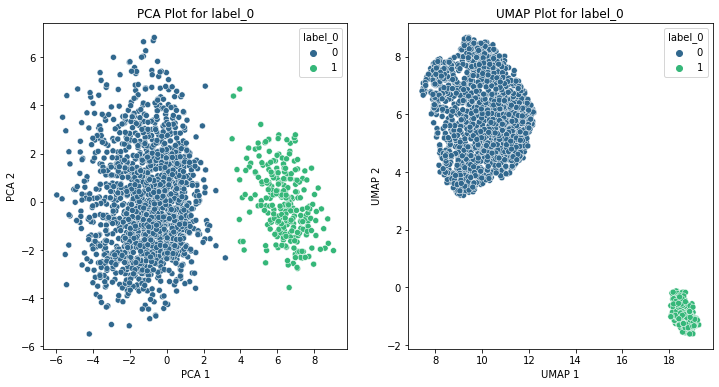

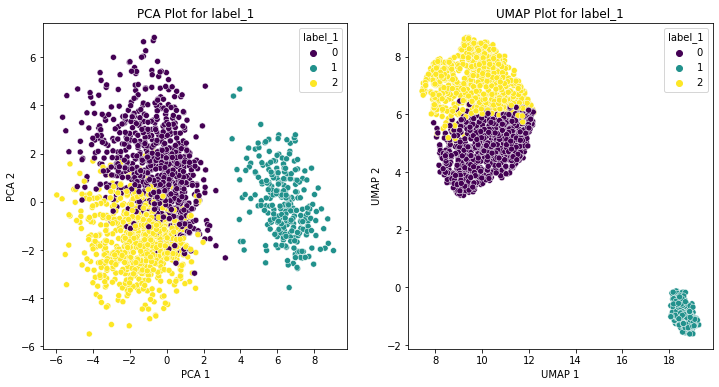

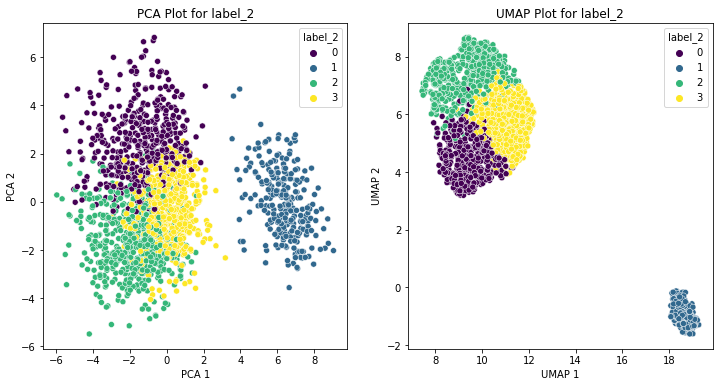

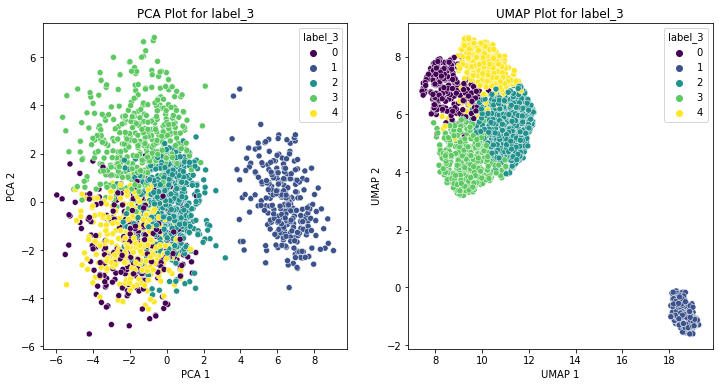

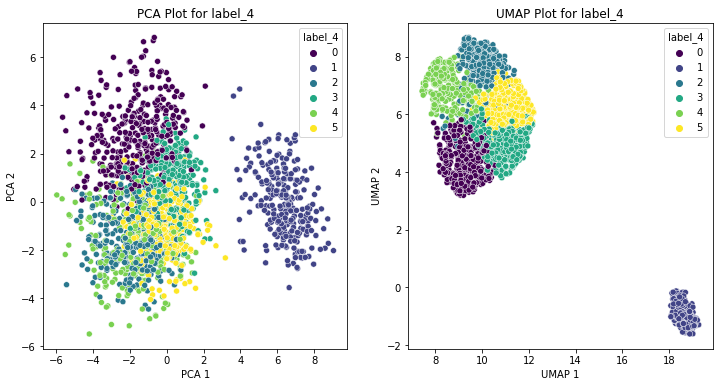

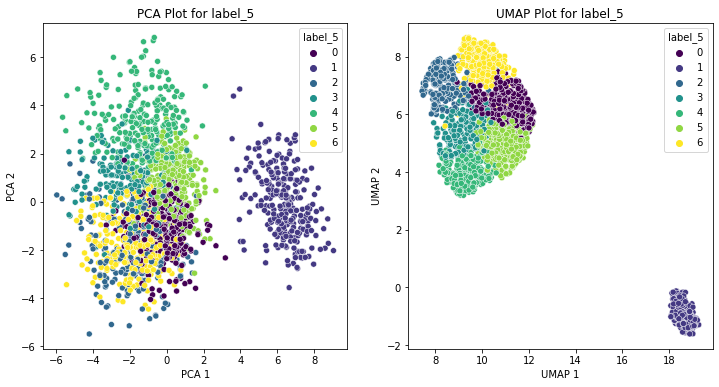

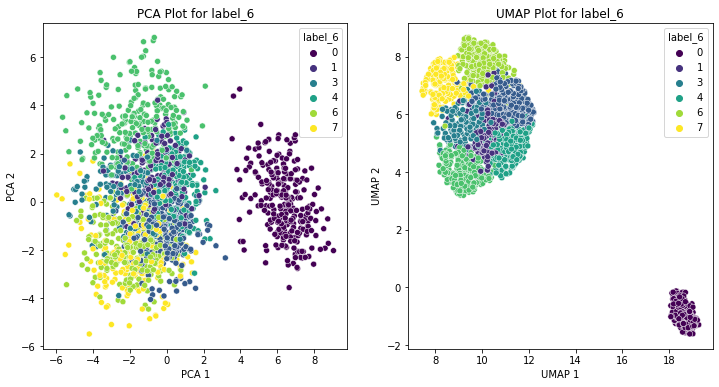

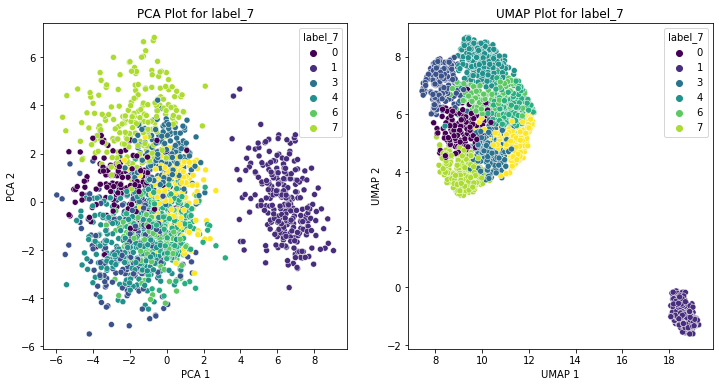

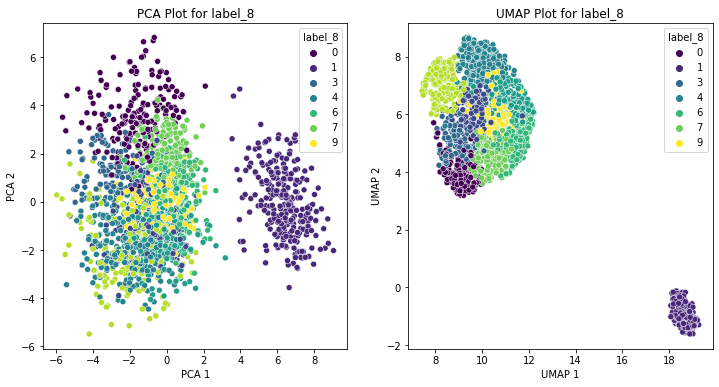

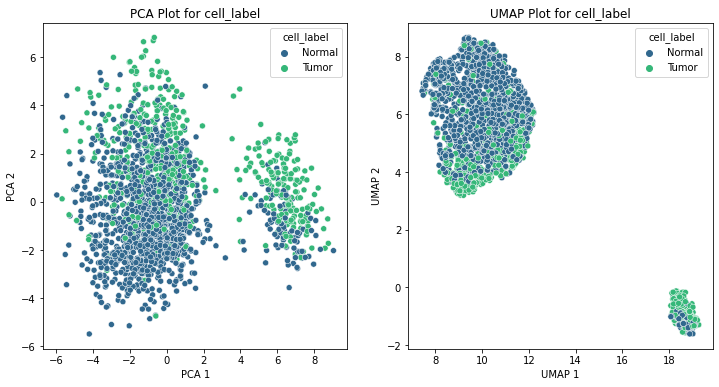

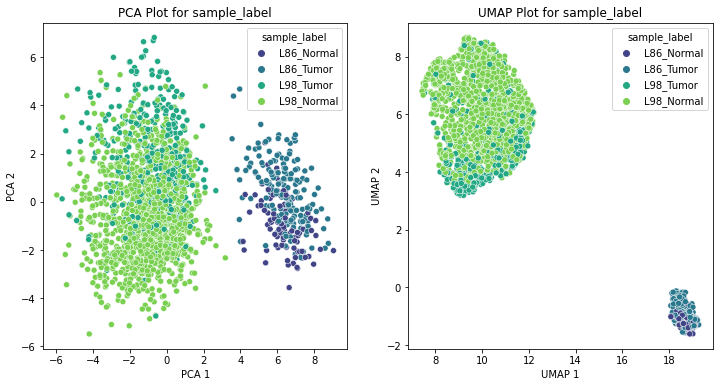

In [30]:
### Identify label columns
label_columns = [col for col in SNP_VAE_res.columns if 'label' in col]

### Iterate through label columns and create plots
for label_col in label_columns:
    plt.figure(figsize=(12, 6))

    # First subplot for PCA
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='PCA_1', y='PCA_2', hue=label_col, data=SNP_VAE_res, palette='viridis')
    plt.title(f'PCA Plot for {label_col}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    # Second subplot for UMAP
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='UMAP_1', y='UMAP_2', hue=label_col, data=SNP_VAE_res, palette='viridis')
    plt.title(f'UMAP Plot for {label_col}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')

    # Save the plot
    plt.savefig(output_folder + pval_column.replace("_pval", "") + "Variant_" + f'{label_col}_embedding.png')

    # Show the plot
    plt.show()

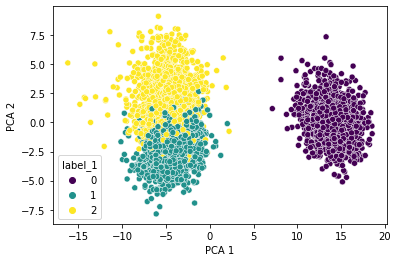

In [19]:
## plot for demosntration
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='label_1', data=SNP_VAE_res, palette='viridis')
#plt.title('PCA Plot for label_1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig(output_folder + 'label_1_embedding.svg', format='svg')

## Using VireoSNP to do the clonal assignment

In [31]:
from vireoSNP import BinomMixtureVB
AD = top30_mquad.ad
DP = top30_mquad.dp
mtSNP_ids = top30_mquad.variants
_model = BinomMixtureVB(n_var=AD.shape[0], n_cell=AD.shape[1], n_donor=5)
_model.fit(AD, DP, min_iter=30, n_init=50)
print(_model.ELBO_iters[-1])







-63609.54507501575


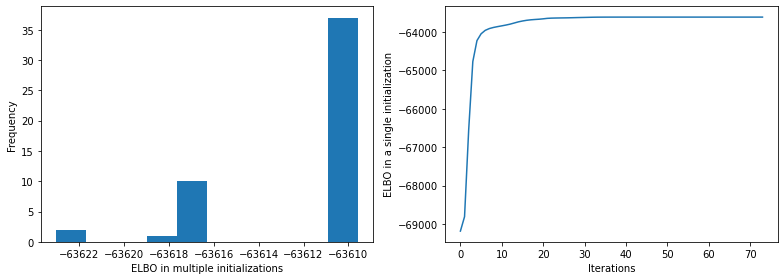

In [32]:
## Check the model fitting
fig = plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.hist(_model.ELBO_inits)
plt.ylabel("Frequency")
plt.xlabel("ELBO in multiple initializations")

plt.subplot(1, 2, 2)
plt.plot(_model.ELBO_iters)
plt.xlabel("Iterations")
plt.ylabel("ELBO in a single initialization")

plt.tight_layout()
plt.show()

### Visualize assignment probability and allele frequency

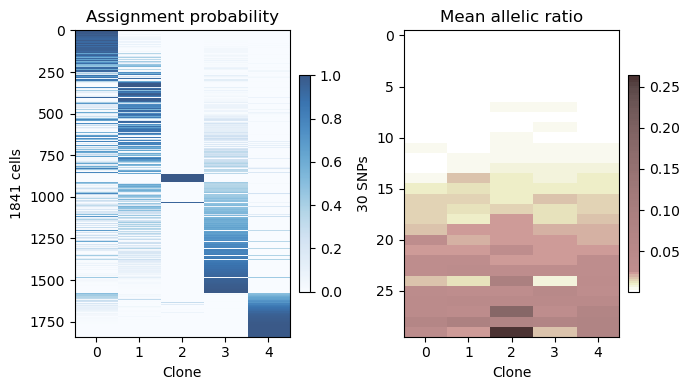

In [33]:
from vireoSNP.plot import heat_matrix

fig = plt.figure(figsize=(7, 4), dpi=100)
plt.subplot(1, 2, 1)
im = heat_matrix(_model.ID_prob, cmap="Blues", alpha=0.8,
                 display_value=False, row_sort=True)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Assignment probability")
plt.xlabel("Clone")
plt.ylabel("%d cells" %(_model.n_cell))
plt.xticks(range(_model.n_donor))


plt.subplot(1, 2, 2)
im = heat_matrix(_model.beta_mu, cmap=segpink, alpha=0.8,
                 display_value=False, row_sort=True)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Mean allelic ratio")
plt.xlabel("Clone")
plt.ylabel("%d SNPs" %(_model.n_var))
plt.xticks(range(_model.n_donor))

plt.tight_layout()
plt.show()

In [49]:
temp = _model.ID_prob.argmax(axis=1)
clone_label = np.char.add('C', temp.astype(str))
## create a dataframe to store the clone label
clone_label_df = pd.DataFrame({'cellID': top30_barcode, 'clone_label': clone_label})

In [50]:
print("The dimension of the clone label data is: ", clone_label_df.shape)
print(clone_label_df.head())
print("The dimension of the clone ID data is: ", cloneID.shape)
print(cloneID.head())
## merge with cloneID
cloneID = cloneID.merge(clone_label_df, on='cellID', how='left')
print("The dimension of the clone ID data is: ", cloneID.shape)
print(cloneID.head())

The dimension of the clone label data is:  (1841, 2)
                 cellID clone_label
0  L86_AAAGGATTCAGAGCGA          C3
1  L86_AACAAGAAGTCACGAG          C1
2  L86_AACCTGACAATGTGGG          C1
3  L86_AACGAAAGTCGACTTA          C0
4  L86_AACGGGACAACGAGGT          C0
The dimension of the clone ID data is:  (7537, 4)
                 cellID cell_label sample sample_label
0  L86_AAACCCAGTGCACATT     Normal    L86   L86_Normal
1  L86_AAACCCAGTTATGTGC     Normal    L86   L86_Normal
2  L86_AAACCCAGTTTCACTT     Normal    L86   L86_Normal
3  L86_AAACGAAAGGAGCTGT      Tumor    L86    L86_Tumor
4  L86_AAACGAACAATGTCTG     Normal    L86   L86_Normal
The dimension of the clone ID data is:  (7537, 5)
                 cellID cell_label sample sample_label clone_label
0  L86_AAACCCAGTGCACATT     Normal    L86   L86_Normal         NaN
1  L86_AAACCCAGTTATGTGC     Normal    L86   L86_Normal         NaN
2  L86_AAACCCAGTTTCACTT     Normal    L86   L86_Normal         NaN
3  L86_AAACGAAAGGAGCTGT      Tumo

In [51]:
cloneID_subste = cloneID[cloneID['clone_label'].notnull()]
## get the contigency table of clone and annotation
contingency_table = pd.crosstab(cloneID['sample_label'], cloneID['clone_label'])

clone_label    C0   C1  C2   C3   C4
sample_label                        
L86_Normal      5   51   0   32    3
L86_Tumor      48   64   2   27   30
L98_Normal    368  267  20  414  123
L98_Tumor     111   84  40   43  109
The chi-square value is:  283.3018960508974
The p-value is:  1.49342489622641e-53
The degree of freedom is:  12
The expected frequency is:  [[ 26.29657795  23.03422053   3.06463878  25.50570342  13.09885932]
 [ 49.41444867  43.28408474   5.75882672  47.92829984  24.61434003]
 [344.45627376 301.72297664  40.14340033 334.09668658 171.58066268]
 [111.83269962  97.95871809  13.03313417 108.46931016  55.70613797]]
clone_label        C0        C1        C2        C3        C4
cell_label                                                   
Normal       0.290725  0.247857  0.015588  0.347623  0.098207
Tumor        0.284946  0.265233  0.075269  0.125448  0.249104


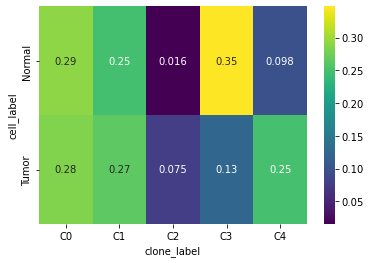

In [56]:
print(contingency_table)
## calculate the chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("The chi-square value is: ", chi2)
print("The p-value is: ", p)
print("The degree of freedom is: ", dof)
print("The expected frequency is: ", ex)
## visualize the contigency table using frequency
contingency_table_freq = pd.crosstab(cloneID['cell_label'], cloneID['clone_label'], normalize='index')
print(contingency_table_freq)
sns.heatmap(contingency_table_freq, annot=True, cmap='viridis')
#plt.savefig(output_folder + "contigency_table.pdf")
plt.show()